In [9]:
import numpy as np

sobel = np.array([[-1, 0, 1],
                  [-2, 0, 2],
                  [-1, 0, 1]])


image = np.array([[0, 0, 0, 0, 0, 0, 0],
                  [0, 1, 0, 2, 3, 1, 0],
                  [0, 3, 2, 0, 7, 0, 0],
                  [0, 0, 6, 1, 1, 4, 0],
                  [0, 0, 0, 0, 0, 0, 0]])

conv_image = np.zeros((3,5))

for i in range(3):
    for j in range(5):
        conv_image[i,j] = np.sum(image[i:(3+i),j:(3+j)]*sobel)
        

print(conv_image)

[[  2.  -1.  11.  -2. -13.]
 [ 10.  -4.   8.   2. -18.]
 [ 14.  -1.  -5.   6.  -9.]]


Image shape: (224, 224)
ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu

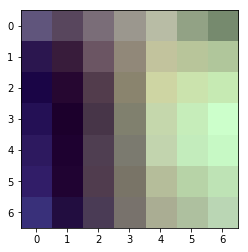

In [2]:

import matplotlib.pyplot as plt
from PIL import Image
import torchvision
import torch
import numpy as np
image = Image.open("images/zebra.jpg")
print("Image shape:", image.size)

model = torchvision.models.resnet18(pretrained=True)
print(model)
first_conv_layer = model.conv1
print("First conv layer weight shape:", first_conv_layer.weight.shape)
print("First conv layer:", first_conv_layer)

# Resize, and normalize the image with the mean and standard deviation
image_transform = torchvision.transforms.Compose([
    torchvision.transforms.Resize((224, 224)),
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])
image = image_transform(image)[None]
print("Image shape:", image.shape)

activation = first_conv_layer(image)
print("Activation shape:", activation.shape)


def torch_image_to_numpy(image: torch.Tensor):
    """
    Function to transform a pytorch tensor to numpy image
    Args:
        image: shape=[3, height, width]
    Returns:
        iamge: shape=[height, width, 3] in the range [0, 1]
    """
    # Normalize to [0 - 1.0]
    image = image.detach().cpu() # Transform image to CPU memory (if on GPU VRAM)
    image = image - image.min()
    image = image / image.max()
    image = image.numpy()
    if len(image.shape) == 2: # Grayscale image, can just return
        return image
    assert image.shape[0] == 3, "Expected color channel to be on first axis. Got: {}".format(image.shape)
    image = np.moveaxis(image, 0, 2)
    return image


#print filters/weights and activations
#torch_image_to_numpy(activation)
print(torch_image_to_numpy(model.conv1.weight[14,:,:,:]).shape)
indices = [14, 26, 32, 49, 52]
plt.imshow(torch_image_to_numpy(first_conv_layer.weight[14,:,:,:])) 



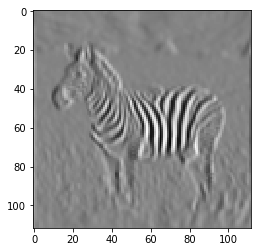

In [28]:


plt.imshow(torch_image_to_numpy(model.conv1.forward(image)[0,14,:,:]),cmap="gray") #activation

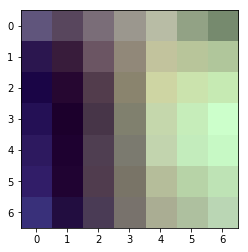

In [27]:
plt.imshow(torch_image_to_numpy(model.conv1.weight[14,:,:,:])) #kernel

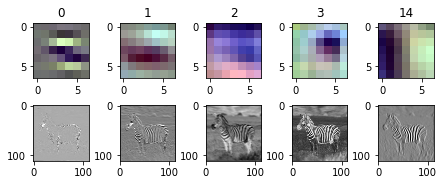

In [110]:
#Task 4b
indices = [14, 26, 32, 49, 52]
fig = plt.figure()
axis = np.array(range(len(indices))) + 1

for i,ax  in zip(indices,axis):
    kernel     = model.conv1.weight[i,:,:,:]
    activation = model.conv1.forward(image)[0,i,:,:] #0th and only picture is zebra.
    
    
    fig.add_subplot(2, len(indices), ax)
    fig.add_subplot(2, len(indices), ax).set_title(str(i))
    plt.imshow(torch_image_to_numpy(kernel)) #kernel image
    
    fig.add_subplot(2, len(indices), len(indices)+ax)
    plt.imshow(torch_image_to_numpy(activation),cmap="gray") #activation image

fig.tight_layout(pad=0.1,h_pad=-10)
plt.show()


    



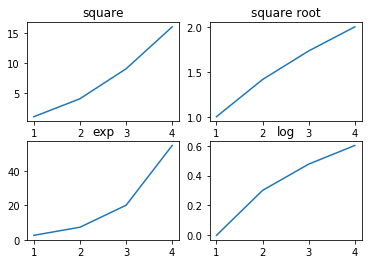

In [53]:
fig,a =  plt.subplots(2,2)
x = np.arange(1,5)
a[0][0].plot(x,x*x)
a[0][0].set_title('square')
a[0][1].plot(x,np.sqrt(x))
a[0][1].set_title('square root')
a[1][0].plot(x,np.exp(x))
a[1][0].set_title('exp')
a[1][1].plot(x,np.log10(x))
a[1][1].set_title('log')
plt.show()

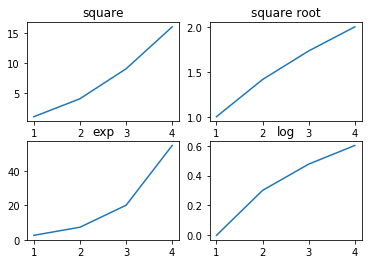

In [129]:
#task 4c

model = torchvision.models.resnet18(pretrained=True)
test = list(model.children())
test.pop() #remove linear layer
test.pop() #remove poopling
print(test)

[Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False), BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True), ReLU(inplace=True), MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False), Sequential(
  (0): BasicBlock(
    (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (1): BasicBlock(
    (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bia

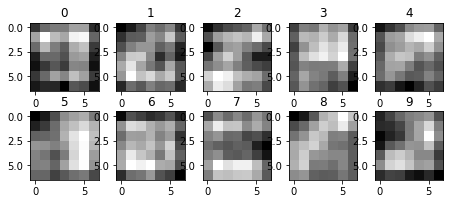

In [194]:
#final task 4c implementation WITHOUT NORMALALIZATION
from torch import nn
import matplotlib.pyplot as plt
from PIL import Image
import torchvision
import torch
import numpy as np
import cv2
model = torchvision.models.resnet18(pretrained=True)

removed_layer0 = list(list(model.children())[:-2][-1])[0]
removed_layer1 = list(list(list(model.children())[:-2][-1])[1].children())[::-1]
model_4c = nn.Sequential(*list(model.children())[:-3],removed_layer0,*removed_layer1)
#this is not necessary in the task! You can just use the normalization

activations = model_4c.forward(image)

fig = plt.figure()
for i in range(10):    
    fig.add_subplot(2, 5, i+1)
    fig.add_subplot(2, 5, i+1).set_title(str(i))
    plt.imshow(torch_image_to_numpy(activations[0,i,:,:]),cmap="gray") 

fig.tight_layout(pad=0.1,h_pad=-10)
plt.show()


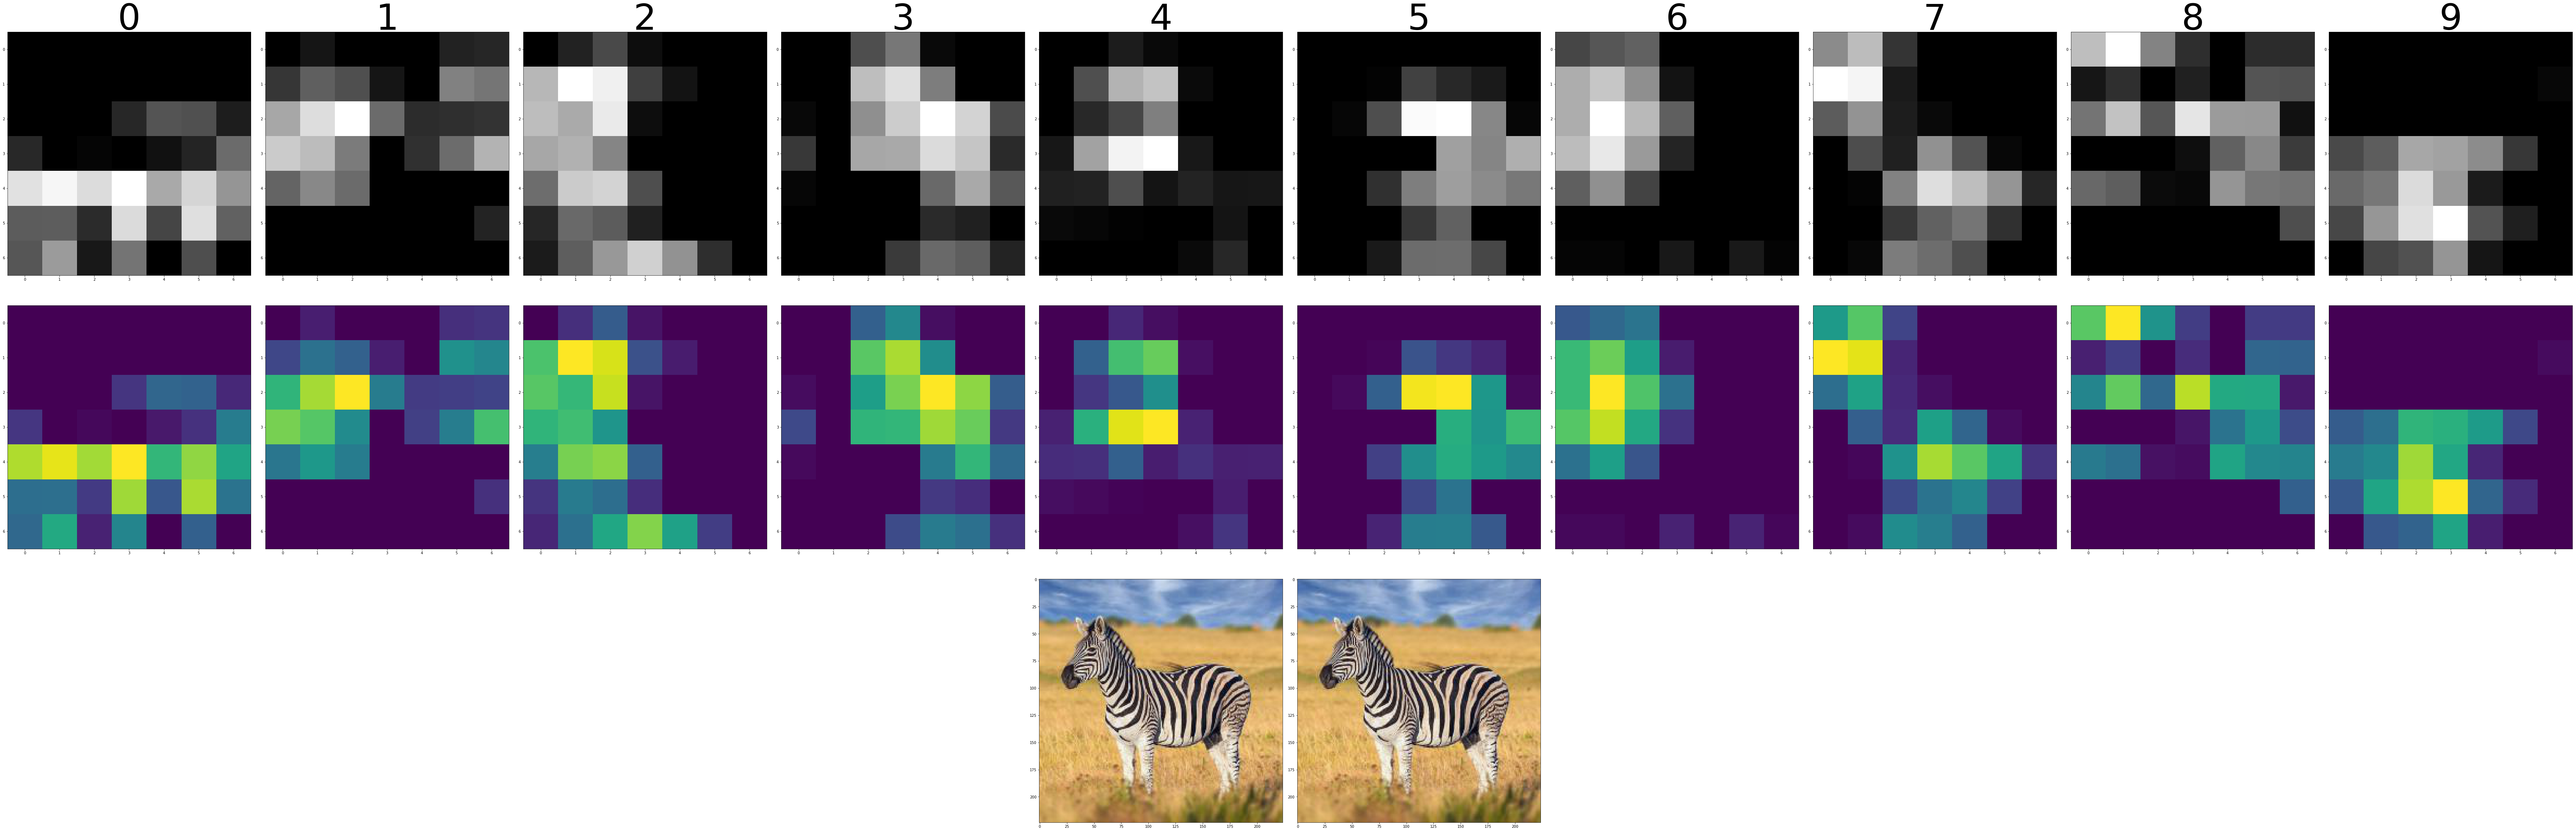

In [225]:
#final task 4c implementation WITH NORMALIZATION
from torch import nn
model = torchvision.models.resnet18(pretrained=True)
model_4c = nn.Sequential(*list(model.children())[:-2])


activations = model_4c.forward(image)

fig = plt.figure(figsize=(100, 40))
for i in range(10):    
    fig.add_subplot(3, 10, i+1)
    #grayscale
    fig.add_subplot(3, 10, i+1).set_title(str(i),fontsize=100)
    plt.imshow(torch_image_to_numpy(activations[0,i,:,:]),cmap="gray") 
    
    #color
    fig.add_subplot(3, 10, 11+i)
    plt.imshow(torch_image_to_numpy(activations[0,i,:,:])) 

#normal image
fig.add_subplot(3, 10, 26)
plt.imshow(torch_image_to_numpy(image[0]))
fig.add_subplot(3, 10, 25)
plt.imshow(torch_image_to_numpy(image[0]))
    
fig.tight_layout(h_pad=-50)
plt.show()

 

In [10]:

import matplotlib.pyplot as plt
from PIL import Image
import torchvision
import torch
import numpy as np
import skimage.transform as skit

image = Image.open("images/zebra.jpg")
print("Image shape:", image.size)

model = torchvision.models.resnet18(pretrained=True)


# Resize, and normalize the image with the mean and standard deviation
image_transform = torchvision.transforms.Compose([
    torchvision.transforms.Resize((224, 224)),
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])
image = image_transform(image)[None]
print("Image shape:", image.shape)


#Task 4c
model = torchvision.models.resnet18(pretrained=True)
model_4c = torch.nn.Sequential(*list(model.children())[:-2]) #this model has the normalized layer after the last convolutional layer. The task says thats fine.
activations = model_4c.forward(image)



Image shape: (224, 224)
Image shape: torch.Size([1, 3, 224, 224])


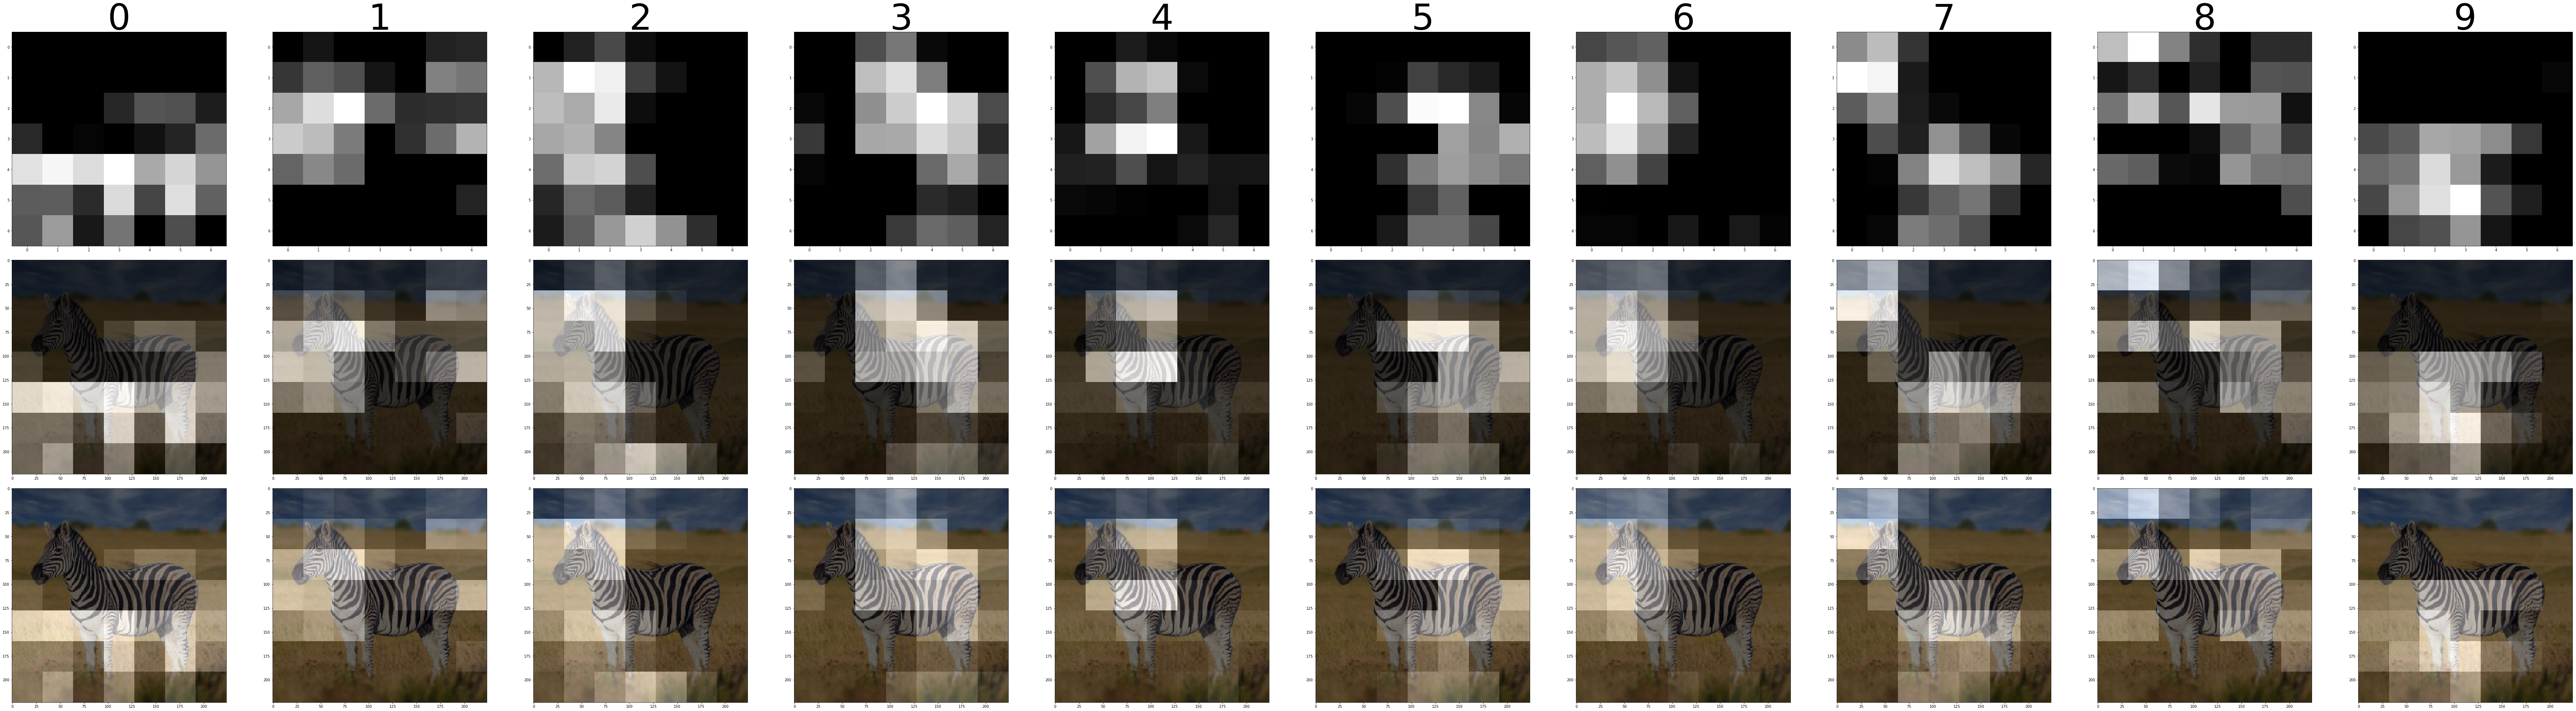

In [13]:
fig = plt.figure(figsize=(100, 40))
for i in range(10):    
    fig.add_subplot(3, 10, i+1)
    #grayscale
    fig.add_subplot(3, 10, i+1).set_title(str(i),fontsize=100)
    plt.imshow(torch_image_to_numpy(activations[0,i,:,:]),cmap="gray") 
    
    #alpha 0.2
    fig.add_subplot(3, 10, 11+i)
    resized_activation = skit.resize(torch_image_to_numpy(activations[0,i,:,:]),  (224, 224), order=0)
    plt.imshow(resized_activation,cmap="gray") 
    plt.imshow(torch_image_to_numpy(image[0]),alpha=0.2)
    
    #alpha 0.4
    fig.add_subplot(3, 10, 21+i)
    resized_activation = skit.resize(torch_image_to_numpy(activations[0,i,:,:]),  (224, 224), order=0)
    plt.imshow(resized_activation,cmap="gray") 
    plt.imshow(torch_image_to_numpy(image[0]),alpha=0.4)

 
    
fig.tight_layout(h_pad=-80,w_pad=10)
plt.savefig("task4c.png")
plt.show()